In [1]:
# packages: random
import random

# packages: data structure
import numpy as np
import pandas as pd
import astropy.io as io

# packages: images with cv
import cv2 as cv

# packages: image processing
# from scipy import ndimage

# packages: pixel-level image generation
# from sklearn.feature_extraction import image

# packages: image generation and plot generation
from matplotlib import pyplot as plt

# packages: astro image generation
import astropy.modeling as modeling

# packages: geometric image generation
# from shapely.geometry import Point, LineString, Polygon

# packages: agent-based image generation
# import turtle

# %pylab inline

In [2]:
# pandas
# https://pandas.pydata.org/pandas-docs/stable/tutorials.html
# https://pandas.pydata.org/pandas-docs/stable/10min.html

# ndimage: image manipulation
# https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage

# ascii:io
# http://docs.astropy.org/en/stable/io/ascii/

# matplotlib
# https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html

# shapely

# turtle
# https://docs.python.org/3/library/turtle.html
# https://michael0x2a.com/blog/turtle-examples

# astropy: modeling:
# http://docs.astropy.org/en/stable/api/astropy.modeling.functional_models.Sersic2D.html

In [7]:
# cv 

def empty_canvas_cv(image_side_length=100, nb_channels=1):
    return np.zeros((image_side_length, image_side_length, nb_channels), np.uint8)



In [4]:
# numpy: empty canvas
def empty_canvas(image_side_length=100):

    return np.indices((image_side_length, image_side_length))
     
    
# scikit learn: circle
def circle_sk(canvas, x_center=50, y_center=50, radius=30):

    y, x = canvas
    circle = (x - x_center)**2 + (y - y_center)**2 < radius**2
    img = circle.astype(float)
    
    return img


# scikit learn: rectangle
def rect_sk(canvas, x_center=50, y_center=50, radius=30):

    y, x = canvas
    rect = (x < x_center + radius) & (x > x_center - radius) & (y < y_center + radius) & (y > y_center - radius)
    img = rect.astype(float)
    
    return img
    
    
# scikit learn: rectangle
def triangle_sk(canvas, x_center=50, y_center=50, radius=30):

    y, x = canvas
    rect = (x < x_center + radius) & (x > x_center - radius) & (y < y_center + radius) & (y > y_center - radius)
    img = rect.astype(float)
    
    return img
    
    
# plot for SPI package
def plot_spi(img):
    plt.axes()    
    plt.imshow(img)
    plt.clf()
        
        
# matplotlib pyplot
def circle_plt(x_center=0, y_center=0, radius=0.75, fc='r', show=False):

    plt.axes()

    circle = plt.Circle((x_center, y_center), radius=radius, fc=fc)
    plt.gca().add_patch(circle)
    plt.axis('scaled')
    imgplot = plt.imshow(img)
    imgplot = plt.savefig("test3.png", dpi = (200))
    #imgplot = plt.imshow()
        
    if show:
        plt.show()

# test each individual function
def test_individual():
    #circle()
    img = circle_sk()
    plot_spi(img)
    #star()
    return

# generate one image data set
def generate_dataset(nb_obj, 
                     image_side_length=100, 
                     index_start=0, 
                     shape='rect',
                     radius_min=2,
                     radius_max=20,
                     show_plot=False, 
                     verbose=False):

    # initiate image values
    fac = -1.0
    x_center_list = np.random.uniform(0 - fac* radius_max, image_side_length + fac* radius_max, nb_obj)
    y_center_list = np.random.uniform(0 - fac* radius_max, image_side_length + fac* radius_max, nb_obj)
    radius_list = np.random.uniform(radius_min, radius_max, nb_obj)
    column_names = ['ident', 'x_center', 'y_center', 'radius', 'shape']
    
    # create empty data structures
    tab_list = np.empty((nb_obj, len(column_names)))
    img_list = np.empty((nb_obj, image_side_length, image_side_length))
    
    # create empty canvas for a single image
    canvas = empty_canvas(image_side_length=image_side_length)
    
    # loop over objects
    for i_obj in np.arange(nb_obj):
     
        # draw object properties from list
        x_center = x_center_list[i_obj]
        y_center = y_center_list[i_obj]        
        radius = radius_list[i_obj]
        
        # identification value
        ident = int(index_start + i_obj)
        
        # create object
        if shape == 'rect':
            img = rect_sk(canvas, x_center=x_center, y_center=y_center, radius=radius)
            shape_num = 0
        elif shape == 'circle':
            img = circle_sk(canvas, x_center=x_center, y_center=y_center, radius=radius)
            shape_num = 1            

        # add tabular data to data list structure
        tab_list[i_obj] = [ident, x_center, y_center, radius, shape_num]
        
        # add image data to image list structure
        img_list[i_obj] = img

        # plot image
        if show_plot:
            plt.figure()
            plt.axes()    
            plt.imshow(img)
            
    # Data Frame: Tabular Data for Objects
    tab_list = pd.DataFrame(tab_list,columns=column_names)
    
    # verbose
    if verbose:
        print(tab_list)
        print(img_list)
    
    return tab_list, img_list


# save data
def save_data(f_data_list, f_img_list, data_list, img_list, verbose=False):

    # Pandas Data Frame for tabular data: save to file
    data_list.to_csv(f_data_list)

    # Numpy Array for image data: save to file
    np.save(f_img_list, img_list)
    
    # verbose
    if verbose:
        print(f_data_list_pd)
        print(f_img_list)
     
    return
        

# combine data sets
def combine_data(frames, data_type='tab'):  
    
    if data_type=='tab':
        data = pd.concat(frames)
    elif data_type=='img':
        data = np.concatenate(frames)
        
    return data


# randomize data    
def randomize_data(tab, img, seed=5, verbose=False):
    
    if verbose:
        print('Before:', tab)
 
    # create randomized indices
    random.seed(seed)  
    nb_tab = len(tab)
    ind_random = np.arange(nb_tab)    
    random.shuffle(ind_random)
    
    # re-order data based on randomized indices
    tab = tab.iloc[ind_random]
    img = img[ind_random]
    
    if verbose:
        print('After:', tab)

    return tab, img


# split data    
def split_data(nb_train, nb_valid, nb_test, tab, img, printcheck=0):

       
    ind_start_train = 0
    ind_end_train = ind_start_valid = ind_start_train + nb_train    
    ind_end_valid = ind_start_test = ind_start_valid + nb_valid
    ind_end_test = ind_start_test + nb_test
    
    if printcheck > 0:
        print(tab[0:printcheck])
        print(ind_start_train, ind_end_train)
        # good place for unit test
   
    # split data in train, valid, test
    tab_train = tab[ind_start_train: ind_end_train]
    img_train = img[ind_start_train: ind_end_train]

    tab_valid = tab[ind_start_valid: ind_end_valid]
    img_valid = img[ind_start_valid: ind_end_valid]

    tab_test = tab[ind_start_test: ind_end_test]
    img_test = img[ind_start_test: ind_end_test]
    
    return tab_train, tab_valid, tab_test, img_train, img_valid, img_test



In [5]:
# Generate Data Parameters
nb_obj = 1000
image_side_length = 64
show_plot = False

# Generate Data
tab_a, img_a = generate_dataset(nb_obj, image_side_length=image_side_length, shape='rect', show_plot=show_plot)
tab_b, img_b = generate_dataset(nb_obj, image_side_length=image_side_length, shape='circle', show_plot=show_plot, index_start=nb_obj)

# combine data
tab = combine_data([tab_a, tab_b])
img = combine_data([img_a, img_b], data_type='img')

# randomize data
tab, img = randomize_data(tab, img, verbose=True)

# save data
f_tab = 'test_generate_pipeline_circle_data.csv'
f_img = 'test_generate_pipeline_circle_image.npy'
save_data(f_tab, f_img, tab, img, verbose=False )


Before:       ident   x_center   y_center     radius  shape
0       0.0  31.323323  42.746014   2.448773    0.0
1       1.0  42.732992  23.037234  14.264696    0.0
2       2.0  30.878020  25.391156   3.163774    0.0
3       3.0  36.098704  25.932020  19.172839    0.0
4       4.0  36.847619  40.204142  17.904288    0.0
5       5.0  41.543711  25.654052  17.526231    0.0
6       6.0  28.150905  26.250166  16.522191    0.0
7       7.0  27.543727  29.053957  15.362774    0.0
8       8.0  40.086332  20.002175   4.725339    0.0
9       9.0  23.250734  27.670365   7.992529    0.0
10     10.0  36.829935  34.095812  11.124781    0.0
11     11.0  35.772559  31.655348  16.028401    0.0
12     12.0  21.540188  30.013876   5.452747    0.0
13     13.0  38.572738  29.185915   2.520848    0.0
14     14.0  28.172930  36.087667  10.763983    0.0
15     15.0  24.561381  31.202893  18.042446    0.0
16     16.0  22.361247  34.039402  19.968749    0.0
17     17.0  26.766144  28.647431  11.619167    0.0
18  

# Test Simple Neural Network

In [ ]:
''' MY DATA
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 32
num_classes = 2
epochs = 5
train_me = True

nb_train = 800
nb_valid = 100
nb_test = 100

# the data, split between train and test sets
output = split_data(nb_train, nb_valid, nb_test, tab, img, printcheck=0)
y_train_temp, y_valid_temp, y_test_temp, x_train, x_valid, x_test = output
y_train = y_train_temp['shape']
y_test = y_test_temp['shape']
img_rows = img_cols = image_side_length

print('x shape', x_train.shape)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
if train_me:
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])


In [ ]:
'''ORIGINAL
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


train_me = False

batch_size = 10
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
print(y_train.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

if train_me:

    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])


In [ ]:
aaa = np.array([0, 1, 2, 3, 4, 5, 6])
print(aaa[0:3])
print(aaa[3:6])

In [ ]:
# package test deep learning
import keras
from keras import backend as K
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
# read data from file
#data_list_pd = pd.read_csv(f_data_list_pd)
#img_list = np.load(f_img_list)
#print(img_list)

In [ ]:
# split data
nb_train = 80
nb_valid = 10
nb_test = 10

num_classes = 2

output = split_data(nb_train, nb_valid, nb_test, tab, img, printcheck=0)
tab_train, tab_valid, tab_test, img_train, img_valid, img_test = output
img_rows = img_cols = image_side_length

if K.image_data_format() == 'channels_first':
    img_train = img_train.reshape(img_train.shape[0], 1, img_rows, img_cols)
    img_test = img_test.reshape(img_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    img_train = img_train.reshape(img_train.shape[0], img_rows, img_cols, 1)
    img_test = img_test.reshape(img_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

img_train = img_train.astype('float32')
img_test = img_test.astype('float32')
img_train /= 255
img_test /= 255
print('x_train shape:', img_train.shape)
print(img_train.shape[0], 'train samples')
print(img_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
print(tab_train.shape)
n = tab_train.shape[0]
categorical = np.zeros((n, num_classes), dtype=np.float32)
print(np.arange(n))
#tab_train = keras.utils.to_categorical(tab_train, num_classes) 
#tab_test = keras.utils.to_categorical(tab_test, num_classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)
355.4


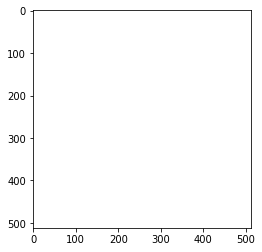

In [71]:
import numpy as np
import cv2 as cv

img = np.ones((512,512,3), np.uint8)*355.4

#draw a red line
img = cv.line(img, (100,100), (300,300), (100,200,255),40)

print(img.shape)
print(max(img[0,0,:]))
#plt.imshow(img)
#plt.imshow(img[:,:,0])
plt.imshow(img[:,:,:])


In [72]:
import graphics

ModuleNotFoundError: No module named 'graphics'

In [73]:
from PIL import Image
import colorsys

im = Image.new('RGB', (100,200), (255,0,0))
im.save("test.png")

c = colorsys.hsv_to_rgb(0,1,1) # h (0 - 1), s (0 - 1), v ( 0 - 1)
im2 = Image.new('RGB', (100,200), (int(255*c[0]), int(255*c[1]), int(255*c[2])))
im2.save("testHSV.png")


c = colorsys.hls_to_rgb(0,1,1) #note HLS not HSL
im2 = Image.new('RGB', (100,200), (int(255*c[0]), int(255*c[1]), int(255*c[2])))
im2.save("testHSV.png")


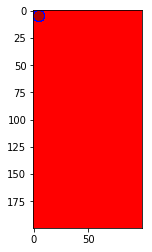

In [78]:
#!/usr/bin/python

from PIL import Image, ImageFont, ImageDraw
import colorsys

im = Image.new('RGB', (100,200), (255,0,0))
dr = ImageDraw.Draw(im)

dr.ellipse((0,0,10,10), fill=180, outline = "blue")

im.save("circle.png")
plt.imshow(im)
